On commence par l'initialisation, la fonction nous permet d'initialiser les paramètres W et b du modèle.

Puisqu'on a $Z = XW + b$

In [16]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.datasets import make_blobs

dimension de X: (100, 2)
dimension de y: (100, 1)


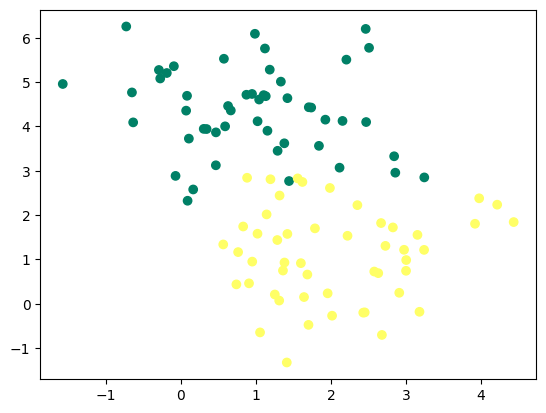

In [17]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print ('dimension de X:', X.shape)
print ('dimension de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

On va coder la fonction qui représente notre modèle de neuronne artificiel Model $(X, W, b)$; dans laquelle on va retrouver notre fonction linéaire $Z = X.W + b$ et notre fonction d'activation $A = \frac{1}{1 + e^{-z}}$.

In [18]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [19]:
def model (X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [20]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


In [21]:
def gradient(A, X, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum (A - y)
    return (dW, db)

In [22]:
def update (dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [23]:
from sklearn.metrics import accuracy_score

In [30]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [25]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialisation(X)
    
    Loss = []

    for i in range (n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradient( A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.xlabel('Iterations')
    plt.ylabel('Log Loss')
    plt.title('Log Loss vs. Iterations')
    plt.show()

    return(W,b)

0.89


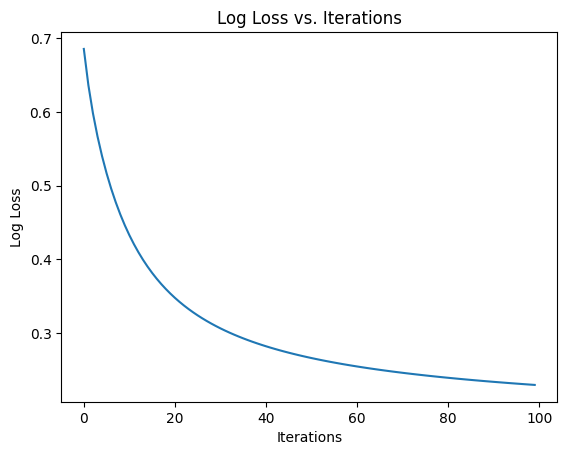

In [26]:
W,b = artificial_neuron(X, y)

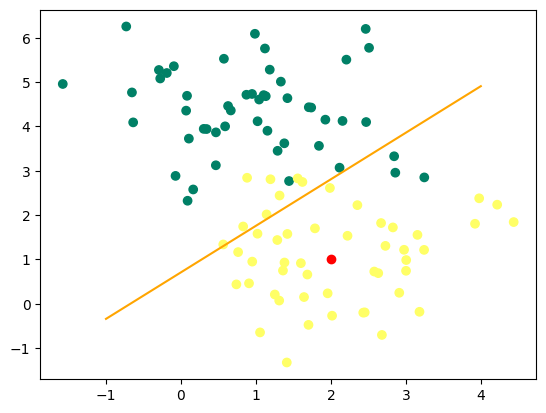

[0.86632309]


array([ True])

In [32]:
new_plant = np.array([2,1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b)/ W[1]

plt.scatter(X[:,0], X[:, 1], c = y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1] , c='r')
plt.plot( x0, x1, c = 'orange')
plt.show()
predict(new_plant, W, b)